In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

df = pd.read_csv("https://s3.amazonaws.com/codecademy-content/programs/data-science-path/linear_regression/honeyproduction.csv")

In [2]:
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [3]:
df.columns

Index(['state', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year'],
      dtype='object')

In [17]:
year_wise_prod = pd.DataFrame(df.groupby("year")["totalprod"].mean()).reset_index()
year_wise_prod

,year,totalprod
0,1998,5.105093e+06
1,1999,4.706674e+06
2,2000,5.106000e+06
3,2001,4.221545e+06
4,2002,3.892386e+06
5,2003,4.122091e+06
6,2004,4.456805e+06
7,2005,4.243146e+06
8,2006,3.761902e+06
9,2007,3.600512e+06


In [16]:
import seaborn as sns
plt.style.use("seaborn")

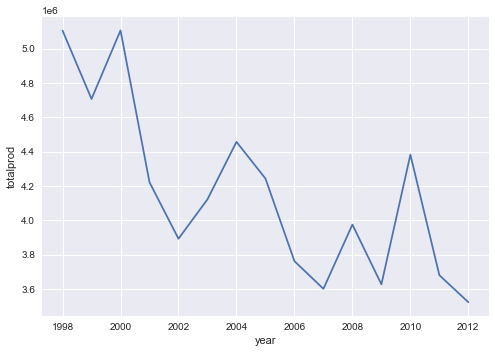

In [21]:
sns.lineplot(x=year_wise_prod.year, y=year_wise_prod.totalprod, markers="o")

In [23]:
X = year_wise_prod["year"]

In [26]:
X = X.values.reshape(-1, 1)

In [27]:
X.ndim

2

In [28]:
y = year_wise_prod["totalprod"]

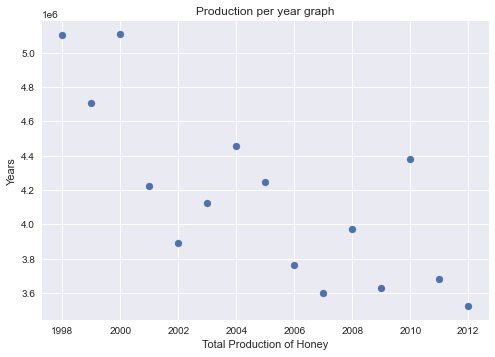

In [31]:
plt.xlabel("Total Production of Honey")
plt.ylabel("Years")
plt.title("Production per year graph")
plt.scatter(X, y, marker = "o")
plt.show()

In [32]:
# We are fitting the Linear Regression model as there is linear relationship between these two variable
from sklearn.linear_model import LinearRegression

In [33]:
linear = LinearRegression()
linear.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
print(linear.coef_)

[-88303.18915238]


In [35]:
print(linear.intercept_)

181208083.1073298


In [36]:
y_predict = linear.predict(X)

In [37]:
y_predict.shape

(15,)

In [38]:
y.shape

(15,)

In [39]:
temp = [i for i in range (1, 16)]

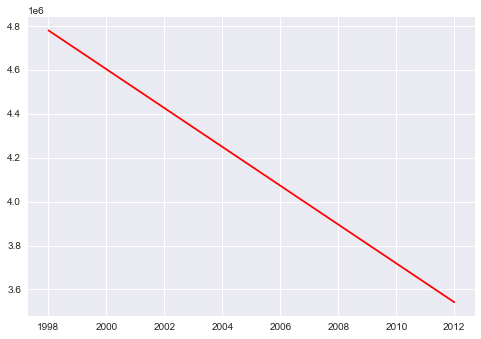

In [44]:
plt.plot(X , y_predict, color = "red")
# plt.plot(temp, y_predict, color = "green")
# plt.ylabel("The prediction VS actual")
plt.show()

In [45]:
# Predicting the values form 2013 to 2050

In [46]:
X_test = np.arange(2013, 2051).reshape(-1,1)

In [49]:
X_test.ndim

2

In [50]:
final_predict = linear.predict(X_test)

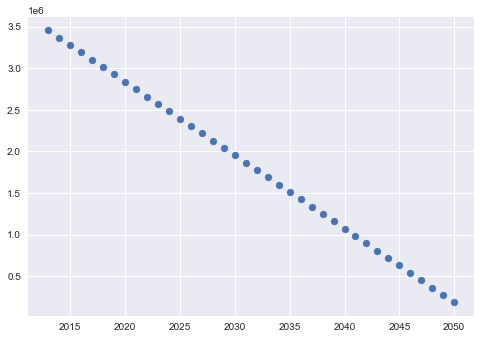

In [51]:
plt.scatter(X_test, final_predict)
plt.show()

In [52]:
final_predict

array([3453763.34358495, 3365460.15443256, 3277156.96528018,
       3188853.77612782, 3100550.58697543, 3012247.39782304,
       2923944.20867065, 2835641.01951829, 2747337.8303659 ,
       2659034.64121351, 2570731.45206112, 2482428.26290876,
       2394125.07375637, 2305821.88460398, 2217518.69545159,
       2129215.50629923, 2040912.31714684, 1952609.12799445,
       1864305.93884209, 1776002.7496897 , 1687699.56053731,
       1599396.37138492, 1511093.18223256, 1422789.99308017,
       1334486.80392778, 1246183.61477539, 1157880.42562303,
       1069577.23647064,  981274.04731825,  892970.85816586,
        804667.6690135 ,  716364.47986111,  628061.29070872,
        539758.10155633,  451454.91240397,  363151.72325158,
        274848.53409919,  186545.34494683])

In [53]:
from sklearn.metrics import mean_absolute_error, r2_score
print("The  MAE is ", mean_absolute_error(y_predict, y))

The  MAE is  257599.15872627485


In [55]:
print("The r2 score is ", r2_score(y_predict, y))

The r2 score is  0.28928320100670757
